# 경계값 문제(boundary value problem)

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 경계값 문제 상미분 방정식을 풀어 보겠다.

우선 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

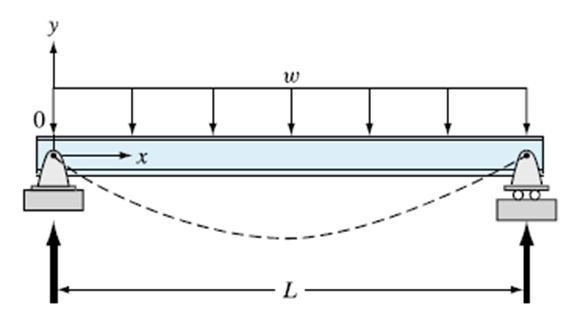

단순 지지되고 균일 하중을 받는 보(beam)가 위의 그림과 같이 있을 때, 보가 $y$축 방향으로 변형되는 모양을 다음과 같은 미분방정식으로 표현할 수 있다:

$$
EI\frac{d^2y}{dx^2}=\frac{wLx}{2}-\frac{wx^2}{2}\tag{1}
$$

여기서, $E=2\times{10}^{11}[Pa]$로 보 재료의 탄성계수, $I=3\times{10}^{-4}[{cm}^4]$로 보 단면에 대한 관성 모멘트, $w=15,000[N/m]$로 단위 길이당 하중, $L=3[m]$로 보의 길이 이다. 또한, 단순 지지되고 있기 때문에 경계조건은 다음과 같다:

$$
y\left(0\right)=y\left(L\right)=0
$$

이번 실습에서는 **식 (1)**로 표현된 미분방정식을 유한차분법을 이용해 풀어보겠다.

## 유한차분공식 적용

**식 (1)**을 유한차분공식으로 변환하면 다음과 같다:
$$
EI\frac{y_{i-1}-2y_i+y_{i+1}}{∆x2}=\frac{wLx_i}{2}-\frac{wx_i^2}{2}
$$
이를 정리하면 다음과 같이 된다:
$$
y_{i-1}-2y_i+y_{i+1}=\frac{(∆x)^2}{EI}\left(\frac{wLx_i}{2}-\frac{wx_i^2}{2}\right)\tag{2}
$$

## 선형방정식으로 표현

**식 (2)**를 문제의 보에 적용하기 위해서는 길이 $L$의 보를 여러 개의 노드로 분할해야 한다. 보를 $(n+1)$개의 노드($n$개의 구간)로 분할했다고 하면, 보에 노드는 다음 그림과 같을 것이다.

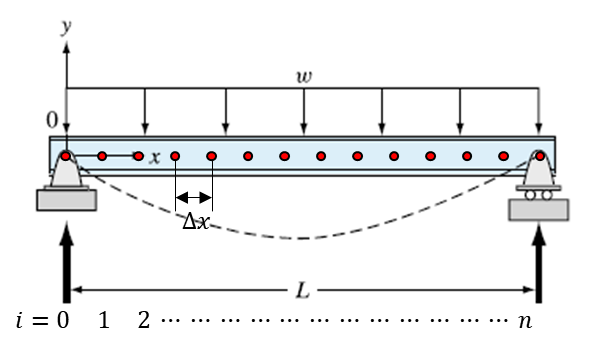

여기서,
$$
∆x=\frac{L}{n}\\
x_i=i\times∆x
$$
이다. 위의 그림에서 내부 노드에 대해 **식 (2)**를 적용하면 다음과 같은 식들이 만들어 진다.
$$
\begin{align}
i=1\Longrightarrow y_0-2y_1+y_2&=\frac{(∆x)^2}{EI}\left(\frac{wLx_1}{2}-\frac{wx_1^2}{2}\right)\\
i=2\Longrightarrow y_1-2y_2+y_3&=\frac{(∆x)^2}{EI}\left(\frac{wLx_2}{2}-\frac{wx_2^2}{2}\right)\\
&\vdots\\
i=n-2\Longrightarrow y_{n-3}-2y_{n-2}+y_{n-1}&=\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-2}}{2}-\frac{wx_{n-2}^2}{2}\right)\\
i=n-1\Longrightarrow y_{n-2}-2y_{n-1}+y_n&=\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-1}}{2}-\frac{wx_{n-1}^2}{2}\right)
\end{align}
$$

그리고 경계 조건을 다음과 같이 표현할 수 있다:
$$
y\left(0\right)=0\rightarrow y_0=0\\
y\left(L\right)=0\rightarrow y_n=0
$$

이를 다시 적용하면 $i=1$인 경우와 $i=n-1$인 경우에 대해 식이 다음과 같이 바뀐다:
$$
i=1\Longrightarrow-2y_1+y_2=\frac{(∆x)^2}{EI}\left(\frac{wLx_1}{2}-\frac{wx_1^2}{2}\right)\\
i=n-1\Longrightarrow y_{n-2}-2y_{n-1}=\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-1}}{2}-\frac{wx_{n-1}^2}{2}\right)
$$

다시 정리하면,
$$
\begin{align}
i=1\Longrightarrow-2y_1+y_2&=\frac{(∆x)^2}{EI}\left(\frac{wLx_1}{2}-\frac{wx_1^2}{2}\right)\\
i=2\Longrightarrow y_1-2y_2+y_3&=\frac{(∆x)^2}{EI}\left(\frac{wLx_2}{2}-\frac{wx_2^2}{2}\right)\\
&\vdots\\
i=n-2\Longrightarrow y_{n-3}-2y_{n-2}+y_{n-1}&=\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-2}}{2}-\frac{wx_{n-2}^2}{2}\right)\\
i=n-1\Longrightarrow y_{n-2}-2y_{n-1}&=\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-1}}{2}-\frac{wx_{n-1}^2}{2}\right)
\end{align}
$$
이다.

이 식을 연립방정식으로 표현하면 다음과 같다:
$$
\underbrace{
\left[\begin{matrix}-2&1&&&&&\\1&-2&1&&&&\\&1&-2&1&&&\\&&\ddots&\ddots&\ddots&&\\&&&1&-2&1&\\&&&&1&-2&1\\&&&&&1&-2\\\end{matrix}\right]}_{\mathbf{A}}
\underbrace{\left[\begin{matrix}y_1\\y_2\\y_3\\\vdots\\y_{n-3}\\y_{n-2}\\y_{n-1}\\\end{matrix}\right]}_{\mathbf{y}}
=
\underbrace{
\left[\begin{matrix}
\frac{(∆x)^2}{EI}\left(\frac{wLx_1}{2}-\frac{wx_1^2}{2}\right)\\
\frac{(∆x)^2}{EI}\left(\frac{wLx_2}{2}-\frac{wx_2^2}{2}\right)\\
\vdots\\
\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-2}}{2}-\frac{wx_{n-2}^2}{2}\right)\\
\frac{(∆x)^2}{EI}\left(\frac{wLx_{n-1}}{2}-\frac{wx_{n-1}^2}{2}\right)\\
\end{matrix}\right]}_{\mathbf{b}}
\tag{3}
$$

위의 식을 보면, $(n+1)$개의 노드로 분할했을 때, 행렬 $\mathbf{A}$는 크기가 $\left(n-1\right)\times\left(n-1\right)$이고, 대각선은 모두 $-2$의 값을, 대각선 옆은 모두 $1$의 값을 가지는 것을 볼 수 있다. 또한 행렬 $\mathbf{y}$는 크기가 $\left(n-1\right)$이고, 각 노드 $i$에서의 변위를 나타낸다. 행렬 $\mathbf{b}$는 크기가 $\left(n-1\right)$이고 모두 유사한 형태를 가지고 있다.

## 파이썬 코드 작성

앞에서 유도한 **식 (3)**을 파이썬 코드로 작성해 보겠다. 우선 필요한 변수들을 다음과 같이 정의한다.

In [ ]:
n = 5 # (n+1)개의 노드
L = 3 # 보의 길이[m]
E = 2e11 # 탄성계수[Pa]
I = 3e-4 # 관성 모멘트[m^4]
w = 15000 # 단위길이당 하중[N/m]
dx = L/n # 간격

그리고 **식 (3)**을 참고하여 행렬 $\mathbf{A}$를 생성하는 코드를 작성한다.

**지시: 식 (3)을 참고하여 행렬 A를 생성하는 코드를 완성하시오.**

In [ ]:
# 행렬 A를 계산한다.

# 행렬 A를 0으로 초기화한다.
A = np.zeros([n-1, n-1])

# 행렬 A의 대각선을 -2로 채운다.
#### 코드 시작 ####
for i in range(1):
  pass
#### 코드 종료 ####

# 행렬 A의 대각선 오른쪽과 왼쪽을 1로 채운다.
#### 코드 시작 ####
for i in range(1):
  pass
#### 코드 종료 ####

print(A)

위의 출력 결과는 **식 (3)**의 행렬 A와 동일해야 한다.

```
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
```

그 다음은 행렬 $\mathbf{b}$를 생성하는 코드를 작성한다.

**지시: 식 (3)을 참고하여 행렬 b를 생성하는 코드를 완성하시오.**

In [ ]:
# 행렬 b를 계산한다.

# 행렬 b를 0으로 초기화한다.
b = np.zeros([n-1])

#### 코드 시작 ####
for i in range(1):
    pass
#### 코드 종료 ####

print(b)

위의 출력 결과는 **식 (3)**의 행렬 b과 동일해야 한다.

```
[6.48e-05 9.72e-05 9.72e-05 6.48e-05]
```

마지막으로 행렬 $\mathbf{y}$는 **식 (3)**의 연립방정식의 해가 된다. 따라서 다음과 같이 코드를 작성한다.

In [ ]:
y = np.linalg.solve(A, b)

print(y)

## 그래프 출력

계산 결과를 시각적으로 확인해 보기 위해 그래프로 출력해 보겠다. 그런데 위에 계산한 행렬 $\mathbf{y}$에는 노드 $1$부터 $(n-1)$까지의 값만 들어가 있다는 사실을 상기해야 한다. 왜냐하면 $y_0$과 $y_n$은 경계조건에서 이미 값을 고정시켜 놓았기 때문에 계산할 필요가 없어 수식에서 제외되었다. 그러나 그래프로 확인할 때에는 $y_0$과 $y_n$도 포함시키는 것이 좋을 것이다.

따라서 다음과 같이 추가한다.

In [ ]:
y = [0, *y, 0]
print(y)

이 코드는 변수 $\mathbf{y}$의 앞과 뒤에 각각 $0$을 추가한다.

그래프의 $x$축에 표시할 값도 다음과 같이 추가해 줍니다.

In [ ]:
x = np.arange(0, L+dx, dx)
print(x)

마지막으로 그래프를 그려준다.

In [ ]:
_, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('beam deflection')
ax.set_xlabel('x')
ax.set_ylabel('y')


지금 계산한 것은 코드에 문제가 없는지 확인해 보기 위해 노드의 개수를 작게 하였다. 실제로 정확도를 높이기 위해서는 노드 개수를 늘려야 한다. $n=5$로 되어있는 것을 $n=50$으로 늘려보아라. 그러면 아래와 같은 좀 더 부드러운 그래프를 얻을 수 있다.

**지시: 위의 코드들에서 n=50으로 수정하여 아래와 동일한 그래프가 출력되도록 하시오.**

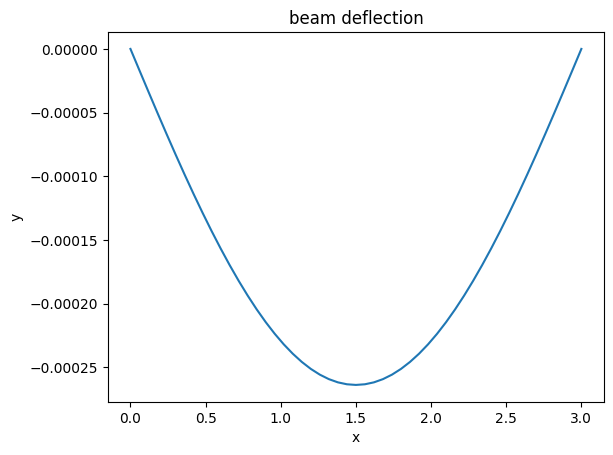

수고하셨습니다.